# Health insurance prediction

In [68]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv("insurance.csv")

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
df.shape

(1338, 7)

In [73]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [75]:
#checking for missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So this tells that there are no null values in our data

separate the catrgorical and numerical columns

    

In [76]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

In [77]:
numerical_cols

['age', 'bmi', 'children', 'charges']

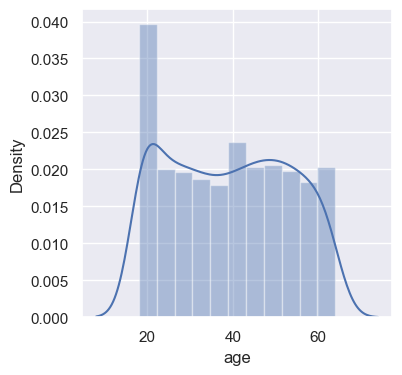

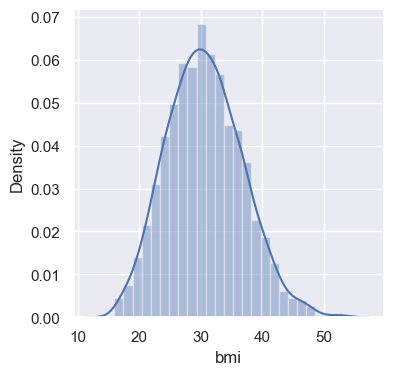

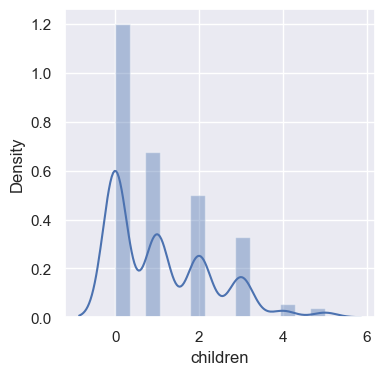

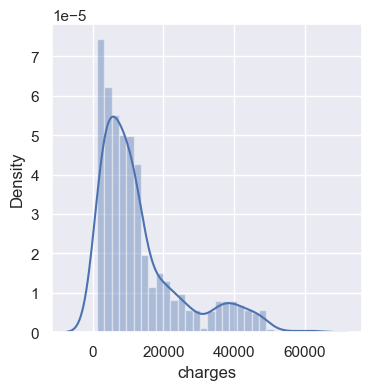

In [78]:
for i in numerical_cols:
    sns.set()#gives grids in background
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])
    plt.show()

So from the above data we can see that there is some skewness in children and charges

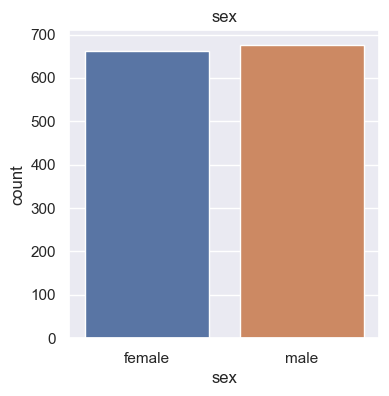

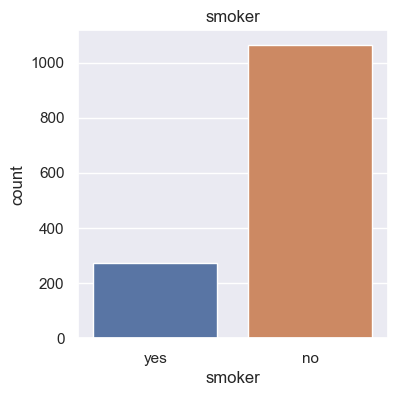

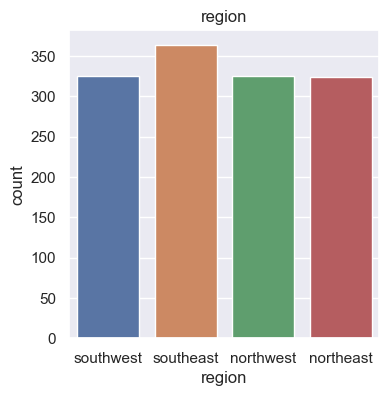

In [79]:
for i in categorical_cols:
    plt.figure(figsize=(4,4))
    sns.countplot(x=i,data=df)
    plt.title(i)
    plt.show()

In [80]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In smoker this is data imbalance

Checking for outliers

In [81]:
numerical_cols

['age', 'bmi', 'children', 'charges']

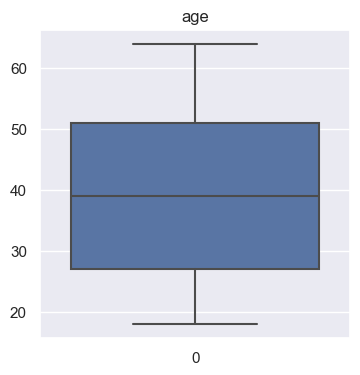

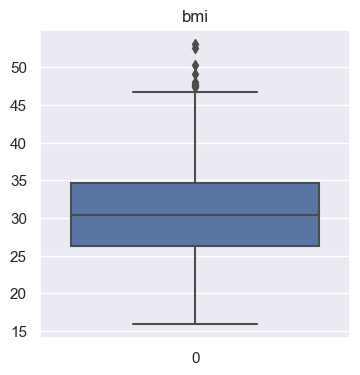

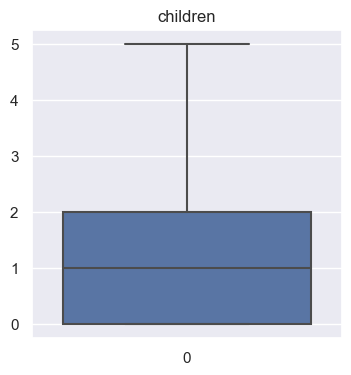

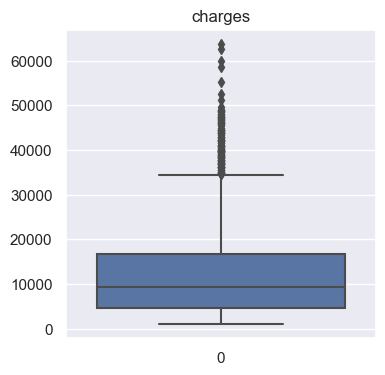

In [82]:
for i in numerical_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

So there are outliers present in bmi and charges

In [83]:
df['bmi'].value_counts().sum()

1338

In [84]:
df['charges'].value_counts().sum()

1338

Removal of outliers

In [85]:
'''for i in ('bmi','charges'):
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df'''

"for i in ('bmi','charges'):\n    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)\n\n    Q1=df[i].quantile(0.25)\n\n    Q2=df[i].quantile(0.75)\n\n    lowl=Q1-1.5*IQR\n    print(lowl)\n    upperl=Q2+1.5*IQR\n    print(upperl)\n    \n    new_df=df[i].copy()\n    \n    new_df=np.where(new_df > upperl , upperl ,\n                           np.where(new_df <lowl, lowl ,new_df\n                                   )\n                           )\n    df[i]=new_df"

In [86]:
IQR=df['bmi'].quantile(0.75)-df['bmi'].quantile(0.25)

Q1=df['bmi'].quantile(0.25)

Q2=df['bmi'].quantile(0.75)

lowl=Q1-1.5*IQR
print(lowl)
upperl=Q2+1.5*IQR
print(upperl)
    
new_df=df['bmi'].copy()
    
new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
df['bmi']=new_df

13.7
47.290000000000006


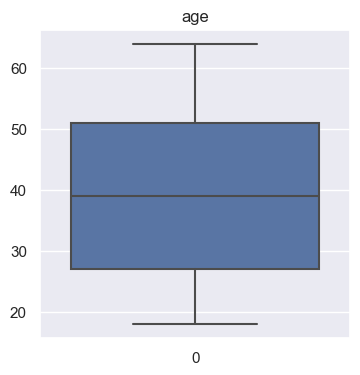

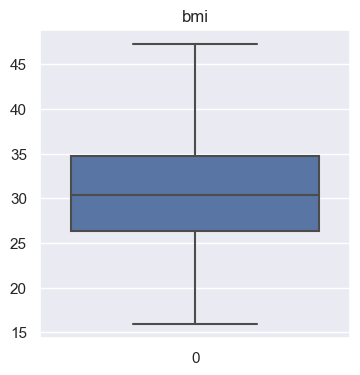

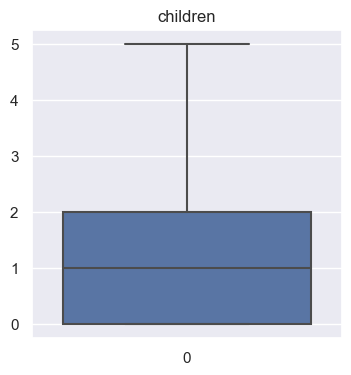

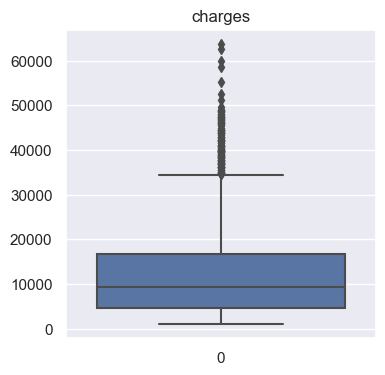

In [87]:
for i in numerical_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [88]:
df.shape

(1338, 7)

So the outliers are been removed using capping

Now there are some categorical columns that should be encoded 

***Encoding***

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
le=LabelEncoder()

In [91]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


So encoding is also done

***Feature selection***

In [92]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.111930,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.044802,0.017163,0.076185,0.004588,0.057292
bmi,0.111930,0.044802,1.000000,0.013700,0.003146,0.157811,0.198997
children,0.042469,0.017163,0.013700,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003146,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157811,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198997,0.067998,0.787251,-0.006208,1.000000


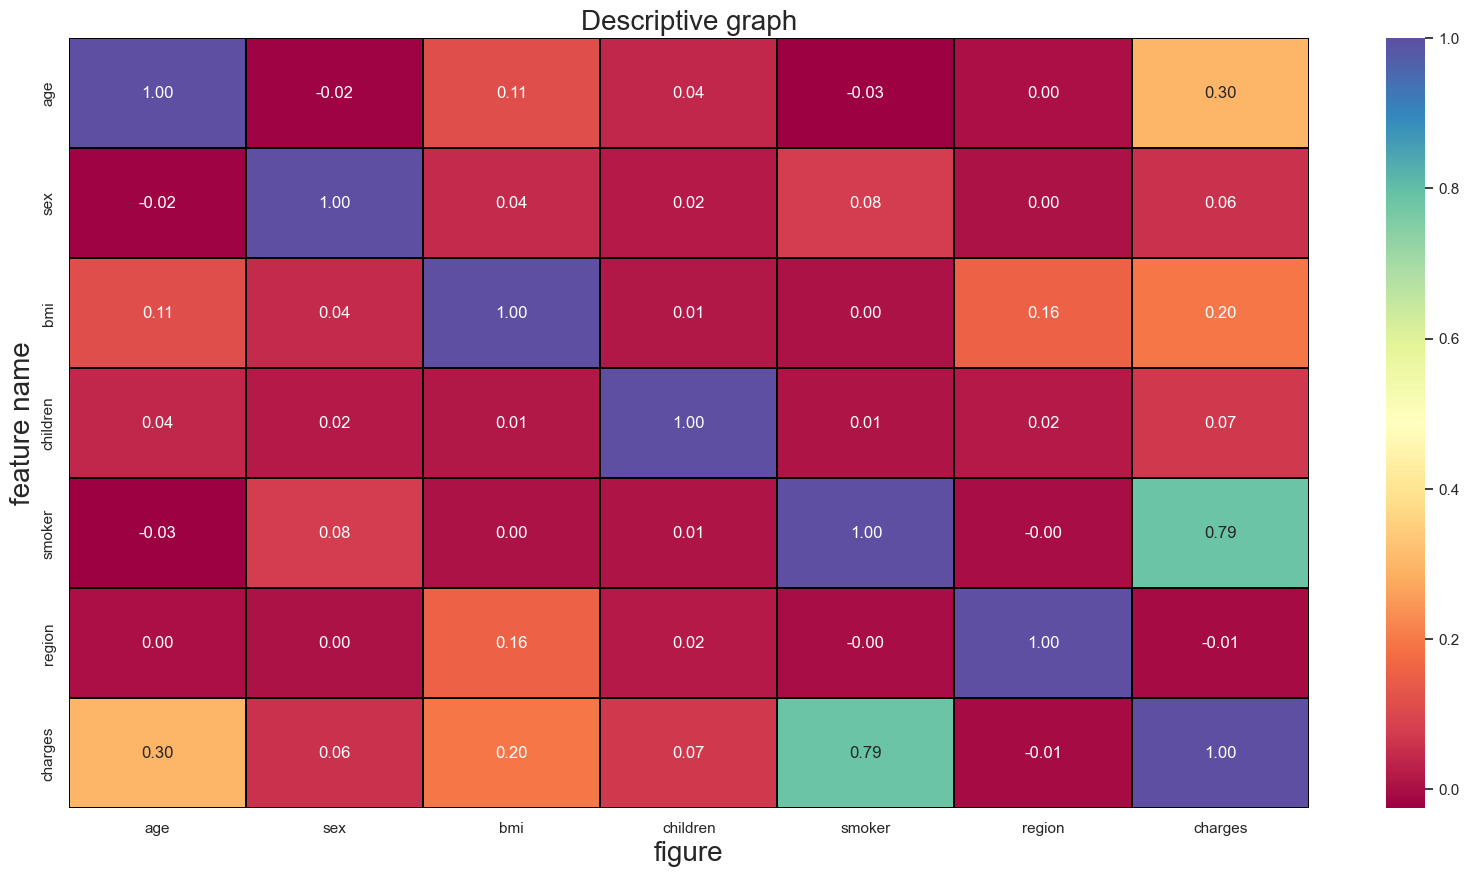

In [93]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

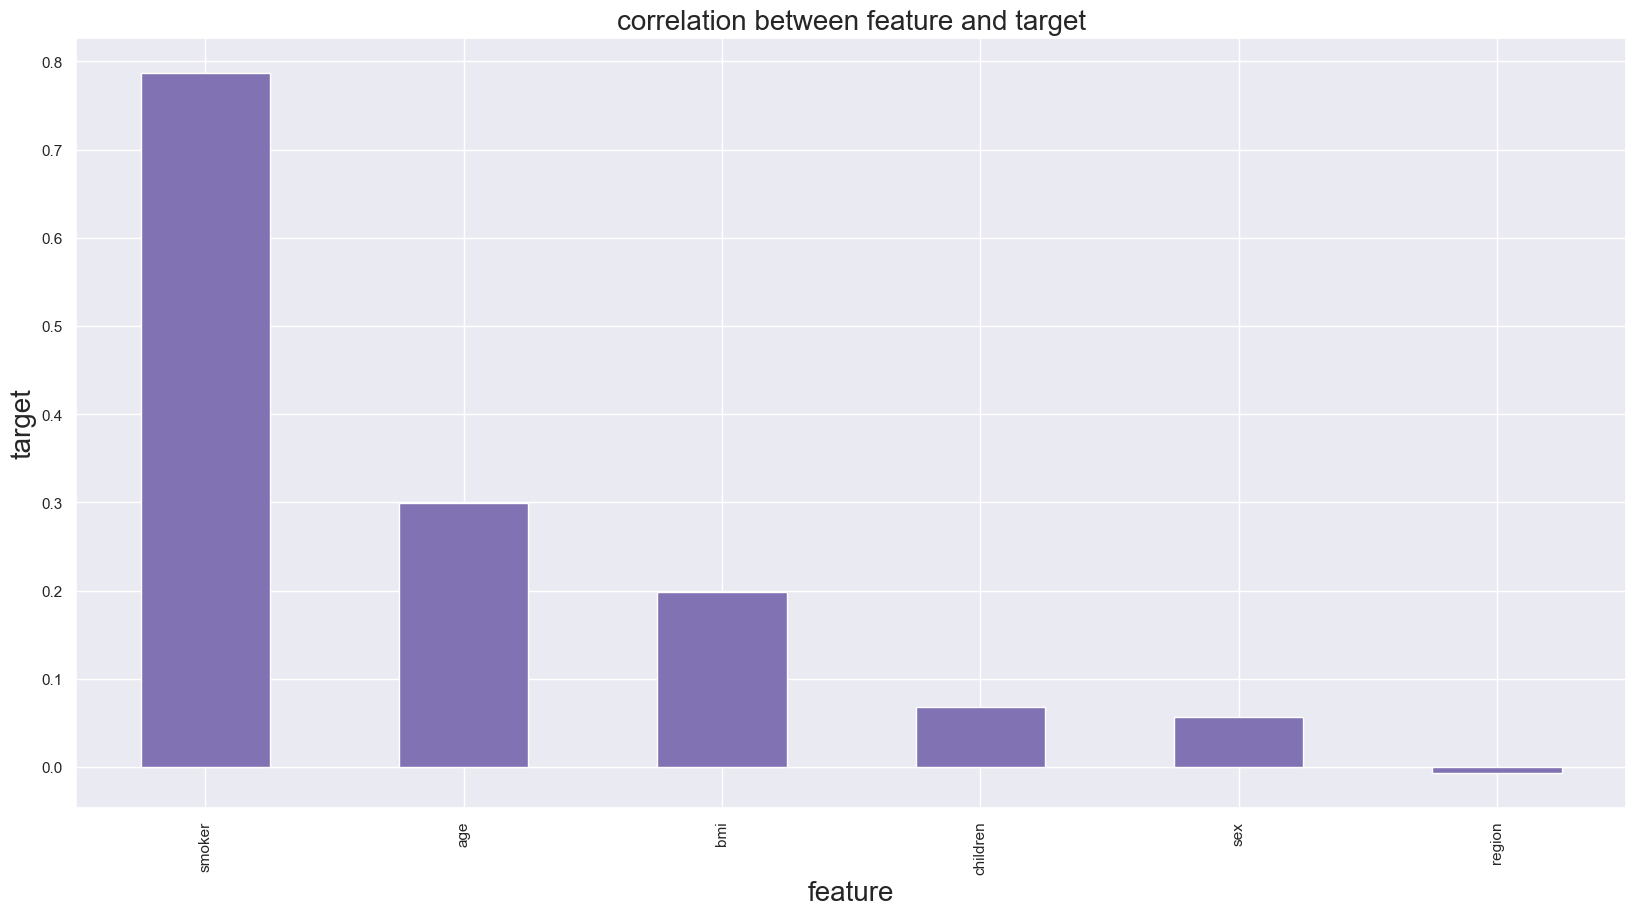

In [94]:
plt.figure(figsize=(20,10))
df.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=20)
plt.ylabel('target',fontsize=20)
plt.title('correlation between feature and target',fontsize=20)
plt.show()

***Splitting the features and target***

In [106]:
x=df.drop(['charges','region'],axis=1)
y=df['charges']

In [107]:
x.shape

(1338, 5)

In [108]:
y.shape

(1338,)

Now lets go to model creation part

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,7.579720,age
1,2.000243,sex
2,8.791545,bmi
3,1.800306,children
4,1.256786,smoker


There is not much inflation its okay to proceed

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

Find for the best random state value

In [121]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.8040331703014444
random state  112


Checking which model gives better results

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [123]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=139)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [124]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.7612552883869536
R2 score train data : 74.39536547455948
Mean absolute error: 4191.820019315821
Mean squared error: 36560394.963631235
Root Mean squared error: 64.74426630456028


In [125]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.8494912774304652
R2 score train data : 97.44169901029144
Mean absolute error: 2667.7661291868567
Mean squared error: 23048294.160887677
Root Mean squared error: 51.650422352453774


In [126]:
lr=DecisionTreeRegressor()
Regression(lr,x,y)

R2 score for test data: 0.6927963393501797
R2 score train data : 99.94189887570573
Mean absolute error: 3221.017221042289
Mean squared error: 47043920.22653293
Root Mean squared error: 56.75400621138819


In [127]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.14745818429099466
R2 score train data : 43.28181735913501
Mean absolute error: 7751.020822743781
Mean squared error: 130554789.23382889
Root Mean squared error: 88.03988200096465


In [128]:
lr=Lasso()
Regression(lr,x,y)

R2 score for test data: 0.76125461283488
R2 score train data : 74.39535717551895
Mean absolute error: 4192.248479544645
Mean squared error: 36560498.414930575
Root Mean squared error: 64.74757508621188


In [129]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.7610320434059349
R2 score train data : 74.3926296921807
Mean absolute error: 4204.88965907544
Mean squared error: 36594581.79283698
Root Mean squared error: 64.8451205494711


Out of these the linear regression is giving good results

In [130]:
def Predictor(lr,x,y,input_data):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=139)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    input_data_array=np.asarray(input_data)
    reshapedarray=input_data_array.reshape(1,-1)
    prediction=lr.predict(reshapedarray)
    print(prediction)

In [133]:
input_data=(32,1,22.88,0,0)
lr=LinearRegression()
Predictor(lr,x,y,input_data)

[3179.42236649]
